In [25]:
import os
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [29]:
# Lista de boas deglutições
audios_list = ['a00028.mp3','a00073.mp3','a00083.mp3','a00111.mp3','a00112.mp3','a00115.mp3','a00133.mp3','a00180.mp3','a00183.mp3','a00376.mp3','a00393.mp3','a00397.mp3','a00443.mp3']

audio_dir = 'MP3'

# Seprando em janelas de 0.5s com passo de 0.25s para analisar os áudios
dados = []
for file_name in os.listdir(audio_dir):
    if file_name in audios_list:
        audio_data, sample_rate = librosa.load(os.path.join(audio_dir, file_name))
        x = np.arange(len(audio_data))/sample_rate

        janela = int(0.5 * sample_rate)
        passo = int(0.25 * sample_rate)

        linha = []
        for i in range(0, len(audio_data), int(passo)):
            max = i + janela
            if max > len(audio_data):
                break
            linha.append((x[i:max], audio_data[i:max]))    
        dados.append(linha)

451 451


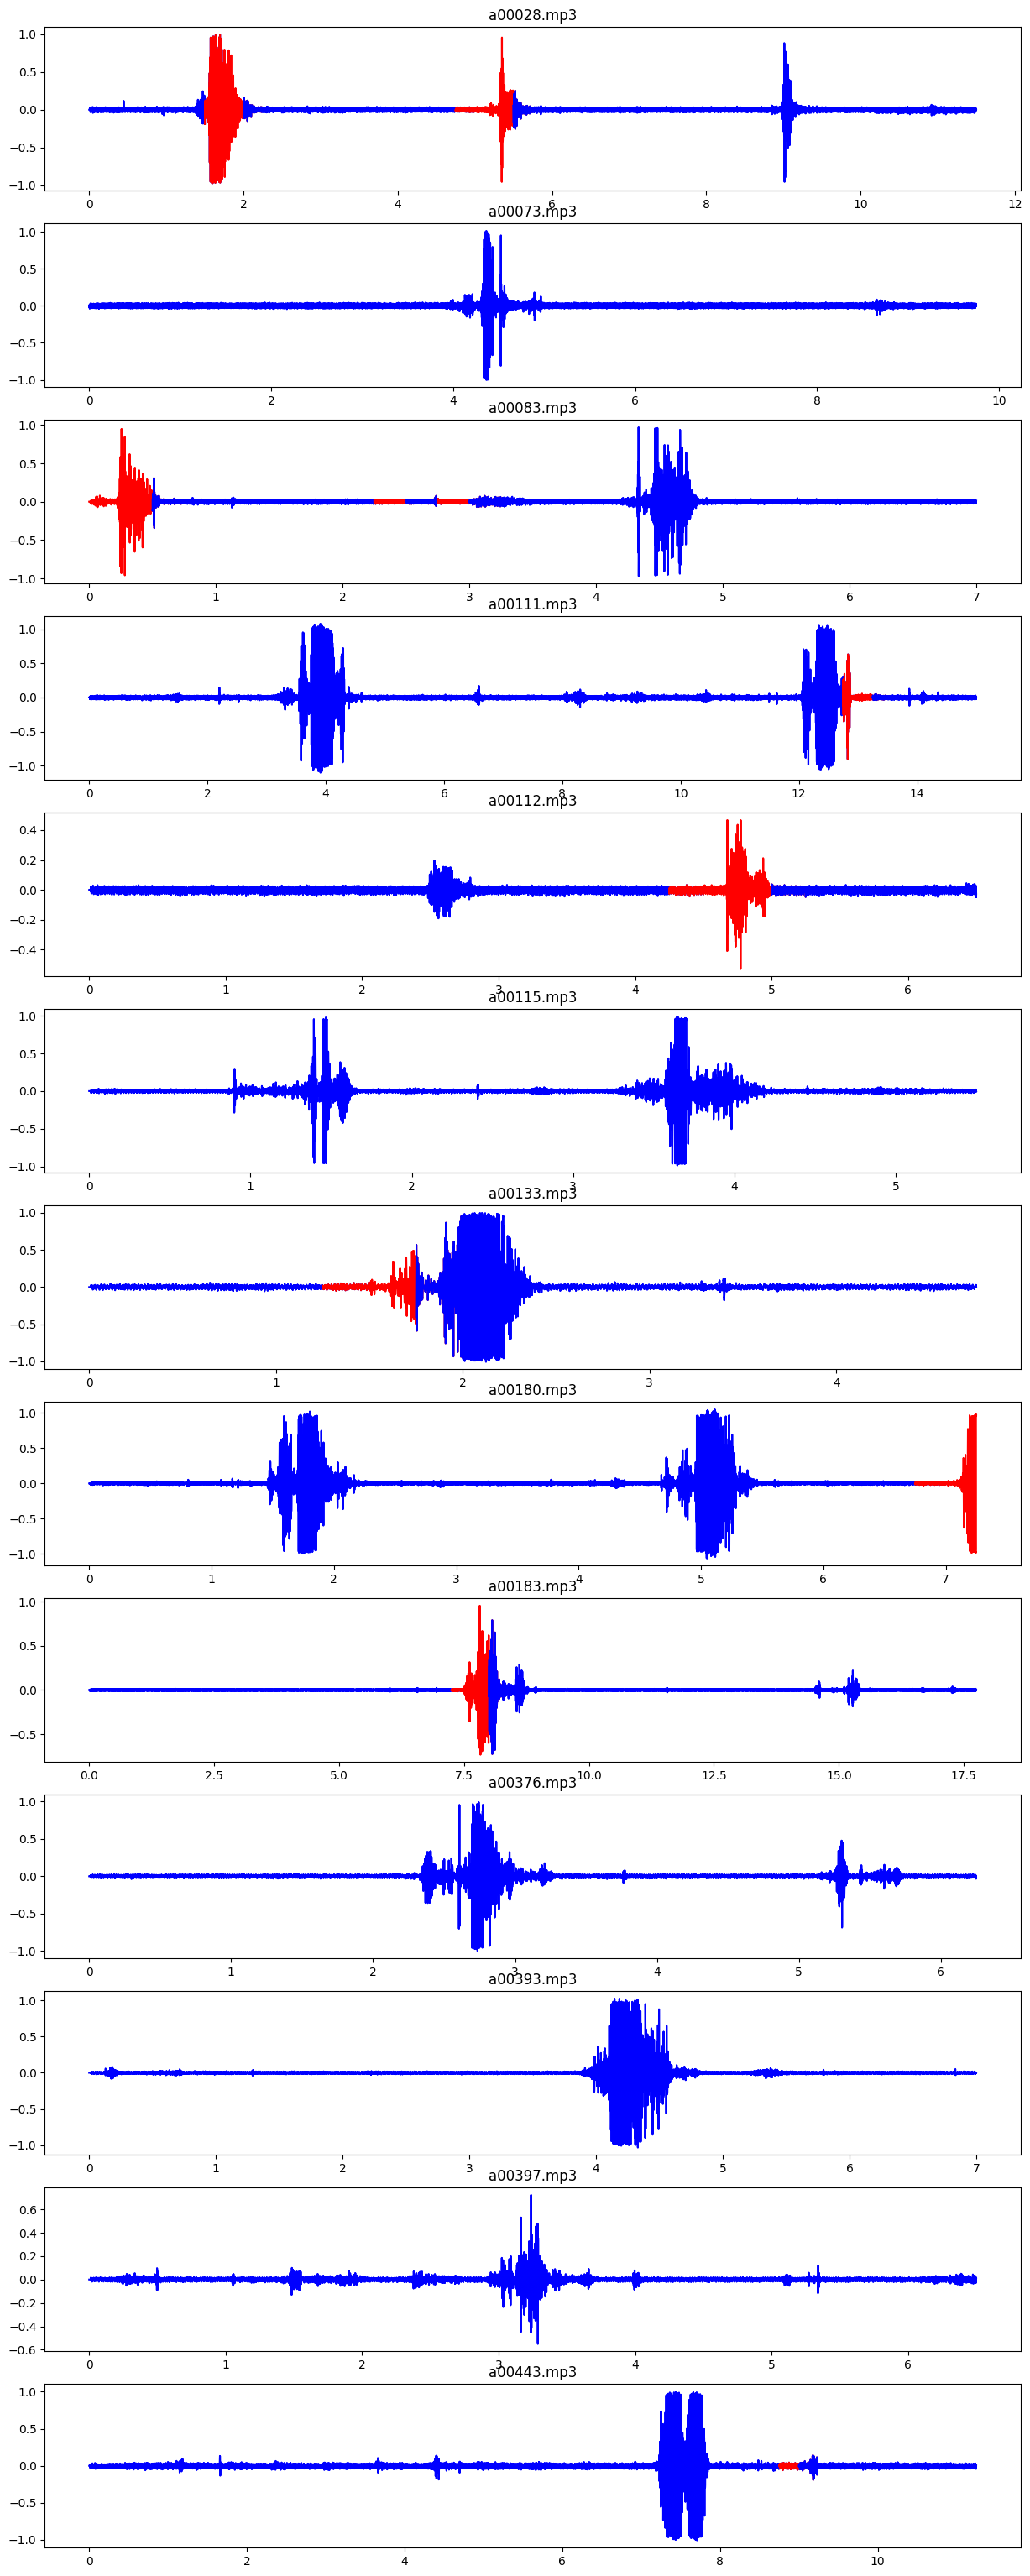

In [33]:
# Dados de treinamento
X = []
for i, linha in enumerate(dados):
    for _, y in linha:
        X.append(y)

# Rótulos para cada janela de áudio
df_y = pd.read_csv('classificacao_janelas.csv')
df_y = df_y.drop('File Name', axis=1)
y = df_y.values
y = np.ravel(np.array(y))
y = y[~np.isnan(y)]

# Classificador Random Forest
clf = RandomForestClassifier(random_state=42, max_depth=5)

# Treinando o classificador com os dados de áudio
clf.fit(X, y)

# Previsões sobre os dados de áudio
ano = clf.predict(X)
ano = (ano == 1)

# Plotando os resultados
fig, ax = plt.subplots(len(dados), 1, figsize=(15, 3*len(dados)))
n=-1
for i, linha in enumerate(dados):
    ax[i].set_title(audios_list[i])
    for x, y in linha:
        n+=1
        ax[i].plot(x, y, color='red' if ano[n] else 'blue')
plt.show()

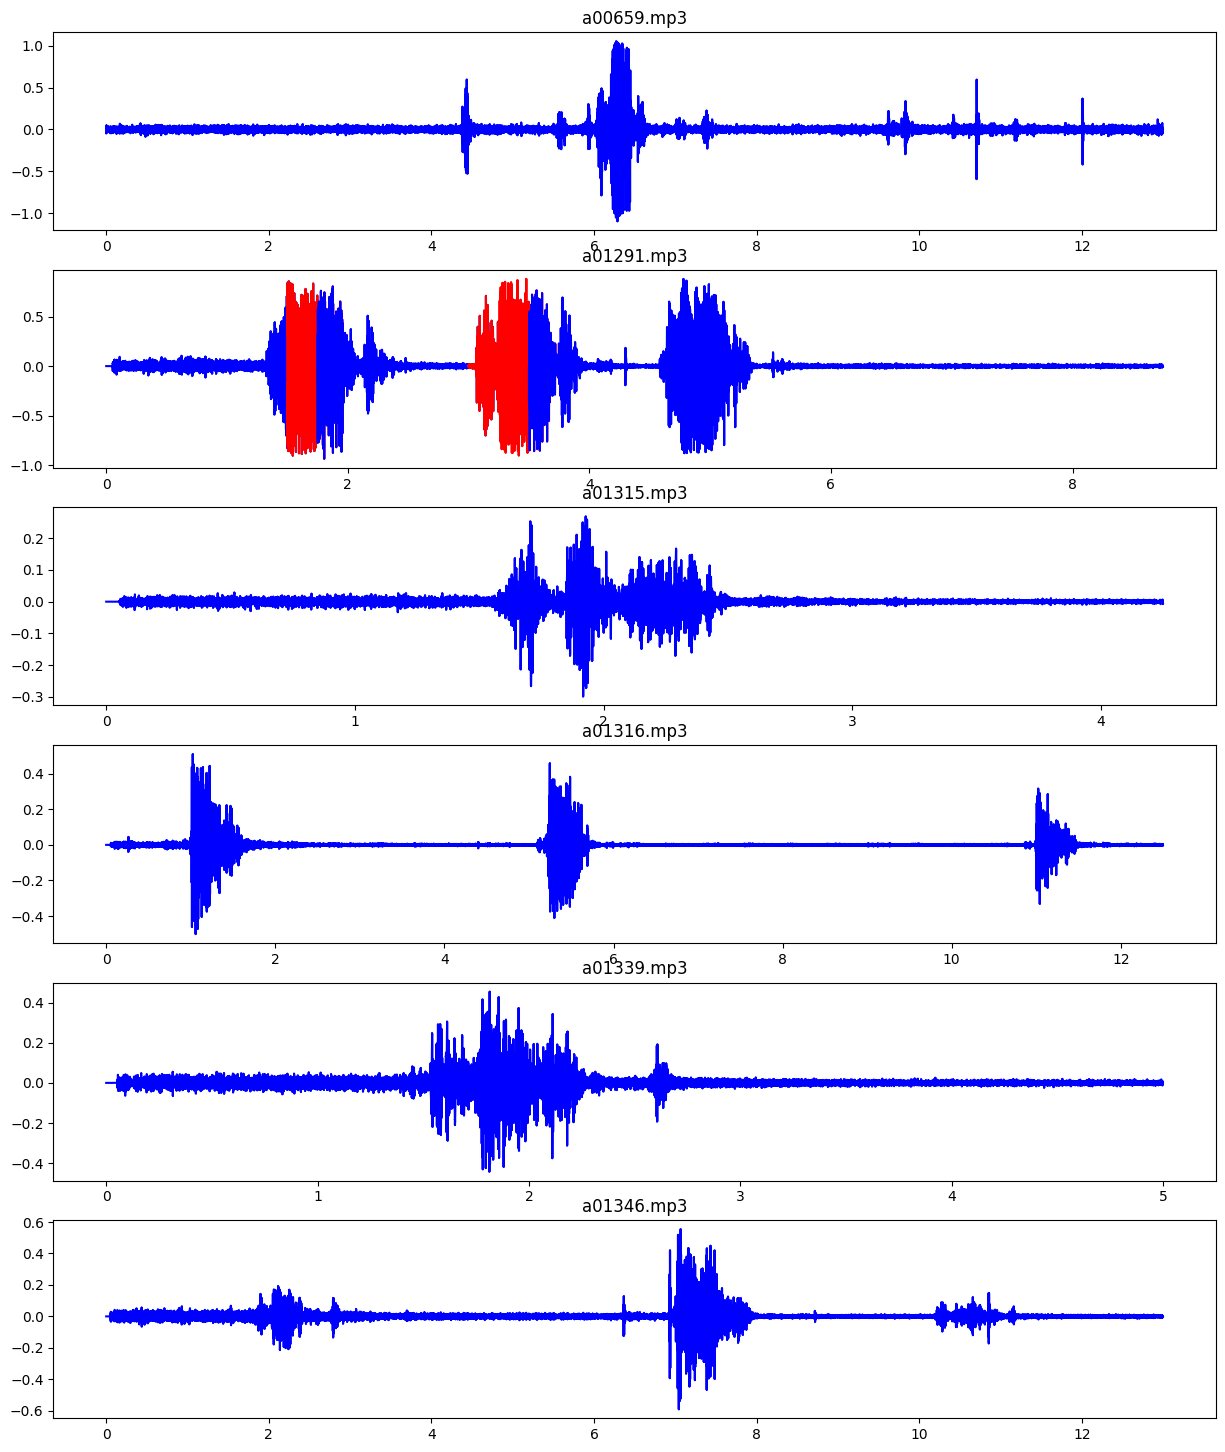

In [28]:
# Áudios válidos para teste
audios_list = ['a00659.mp3', 'a01291.mp3', 'a01315.mp3', 'a01316.mp3', 'a01339.mp3', 'a01346.mp3']

audio_dir = 'test'

# Seprando em janelas de 0.5s com passo de 0.25s para analisar os áudios para testes
dados = []
for file_name in os.listdir(audio_dir):
    if file_name in audios_list:
        audio_data, sample_rate = librosa.load(os.path.join(audio_dir, file_name))
        x = np.arange(len(audio_data))/sample_rate

        janela = int(0.5 * sample_rate)
        passo = int(0.25 * sample_rate)

        linha = []
        for i in range(0, len(audio_data), int(passo)):
            max = i + janela
            if max > len(audio_data):
                break
            linha.append((x[i:max], audio_data[i:max]))    
        dados.append(linha)

# Dados de teste
X_test = []
for i, linha in enumerate(dados):
    for _, y in linha:
        X_test.append(y)

# Previsões sobre os dados de áudio
ano = clf.predict(X_test)
ano = (ano == 1)

# Plotando os resultados
fig, ax = plt.subplots(len(dados), 1, figsize=(15, 3*len(dados)))
n=-1
for i, linha in enumerate(dados):
    ax[i].set_title(audios_list[i])
    for x, y in linha:
        n+=1
        ax[i].plot(x, y, color='red' if ano[n] else 'blue')
plt.show()